In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer

In [2]:
sdf = pd.read_csv('F:/Datasets/AD newDS/ADNI/adni.csv')
sdf.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,5275,135_S_5275,bl,135,ADNI2,ADNI2,27-08-2013,AD,78.0,Female,...,490.4,53.18,1.03993,NaN,1.571460,0,0,0,0,41:10.0
1,5252,009_S_5252,bl,9,ADNI2,ADNI2,14-08-2013,AD,56.5,Male,...,238.0,27.87,1.00227,NaN,1.435610,0,0,0,0,41:10.0
2,5251,016_S_5251,bl,16,ADNI2,ADNI2,08-10-2013,AD,66.1,Female,...,708.0,70.45,1.16539,NaN,1.515710,0,0,0,0,41:10.0
3,5241,023_S_5241,bl,23,ADNI2,ADNI2,25-10-2013,AD,87.8,Male,...,343.7,26.32,1.02216,NaN,0.927626,0,0,0,0,41:10.0
4,5240,018_S_5240,bl,18,ADNI2,ADNI2,26-08-2013,AD,62.7,Female,...,NaN,NaN,1.35676,NaN,1.035730,0,0,0,0,46:25.0


In [3]:
sdf.groupby('DX_bl').size()

DX_bl
AD      145
CN      136
EMCI    155
LMCI    148
dtype: int64

In [4]:
fdf = sdf[['CDRSB_bl','ADAS11_bl','MMSE_bl','mPACCdigit_bl','Ventricles_bl','Hippocampus_bl','WholeBrain_bl','MOCA_bl','EcogPtTotal_bl','EcogSPTotal_bl','PTAU_bl','AV45_bl','FDG_bl']]
fdf.head()

,CDRSB_bl,ADAS11_bl,MMSE_bl,mPACCdigit_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,PTAU_bl,AV45_bl,FDG_bl
0,3.0,16.0,24,-13.9624,71716.0,6843.0,1146280.0,20.0,1.35897,2.83333,53.18,1.571460,1.03993
1,8.0,17.0,25,-11.6207,44247.0,7301.0,1177300.0,19.0,1.66667,3.42857,27.87,1.435610,1.00227
2,2.5,12.0,26,-10.1298,33050.0,5697.0,874118.0,19.0,1.38889,1.48718,70.45,1.515710,1.16539
3,7.0,24.0,22,-19.0467,NaN,2991.0,NaN,14.0,1.40541,3.43590,26.32,0.927626,1.02216
4,2.0,18.0,20,-17.2589,14149.0,7694.0,1012760.0,17.0,3.65789,1.46154,NaN,1.035730,1.35676


In [5]:
tdf = sdf[['DX_bl']]
tdf.head()

,DX_bl
0,AD
1,AD
2,AD
3,AD
4,AD


In [6]:
tar= preprocessing.label_binarize(tdf,classes=['AD','CN','EMCI','LMCI'])
n_classes = tar.shape[1]
n_classes

4L

In [7]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(fdf, tar, test_size=0.2, random_state=0)

In [8]:
X_train = X_train.fillna(X_train.mean())
min_max_scaler = preprocessing.MinMaxScaler()
XtrainNm = min_max_scaler.fit_transform(X_train)
X_train = XtrainNm
X_train

array([[ 0.2       ,  0.57894737,  0.72727273, ...,  0.33512288,
         0.55015462,  0.40831127],
       [ 0.4       ,  0.60526316,  0.27272727, ...,  0.2457568 ,
         0.43663238,  0.29115977],
       [ 0.05      ,  0.26315789,  0.90909091, ...,  0.19804343,
         0.42452392,  0.73517337],
       ..., 
       [ 0.05      ,  0.05263158,  0.90909091, ...,  0.26544977,
         0.29926485,  0.74092638],
       [ 0.15      ,  0.15789474,  1.        , ...,  0.00811262,
         0.19089368,  0.43814573],
       [ 0.15      ,  0.39473684,  0.90909091, ...,  0.23586256,
         0.4055272 ,  0.4700893 ]])

In [9]:
X_validation = X_validation.fillna(X_validation.mean())
XValNm = min_max_scaler.fit_transform(X_validation)
X_validation = XValNm
X_validation

array([[ 0.4375    ,  0.43589744,  0.27272727, ...,  0.38690395,
         0.85986436,  0.36823566],
       [ 0.25      ,  0.15384615,  0.90909091, ...,  0.0305665 ,
         0.12396131,  0.74628819],
       [ 0.        ,  0.20512821,  0.90909091, ...,  0.13096047,
         0.60245861,  0.64460178],
       ..., 
       [ 0.75      ,  0.48717949,  0.18181818, ...,  0.38608885,
         0.76295536,  0.22677992],
       [ 0.0625    ,  0.28205128,  0.90909091, ...,  0.14454558,
         0.2020871 ,  0.87251676],
       [ 0.6875    ,  0.46153846,  0.27272727, ...,  0.13911153,
         0.46292206,  0.47538631]])

In [10]:
# SVC - Kernel= poly
svc_classifier = OneVsRestClassifier(svm.SVC(kernel='poly', C=1, gamma=1))

In [11]:
svc_y_score = svc_classifier.fit(X_train, Y_train).decision_function(X_validation)

In [30]:
def rocauc_curve(y_score,title):
    # Sk-learn roc-auc plot snippet
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_validation[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    lw = 2
    plt.figure(figsize=(15,10))
    colors = cycle(['red', 'green', 'yellow','darkorange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
        
    plt.plot([0, 1], [0, 1], 'k--', lw=lw,color='navy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

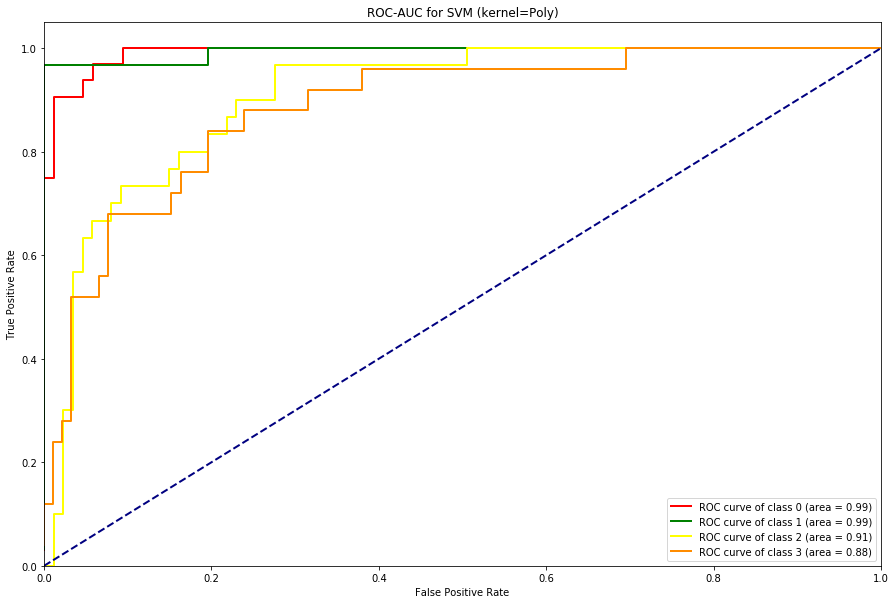

In [31]:
# roc-auc for SVC - Kernel poly
rocauc_curve(svc_y_score,'ROC-AUC for SVM (kernel=Poly)')

In [14]:
# Linear SVC starts
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(fdf, tar, test_size=0.2, random_state=0)
X_train = X_train.fillna(X_train.mean())
min_max_scaler = preprocessing.MinMaxScaler()
XtrainNm = min_max_scaler.fit_transform(X_train)
X_train = XtrainNm
X_validation = X_validation.fillna(X_validation.mean())
XValNm = min_max_scaler.fit_transform(X_validation)
X_validation = XValNm

In [15]:
# Linear SVM
linSVM_classifier = OneVsRestClassifier(svm.LinearSVC(C=10,multi_class='crammer_singer'))

In [16]:
linSVM_y_score = linSVM_classifier.fit(X_train, Y_train).decision_function(X_validation)

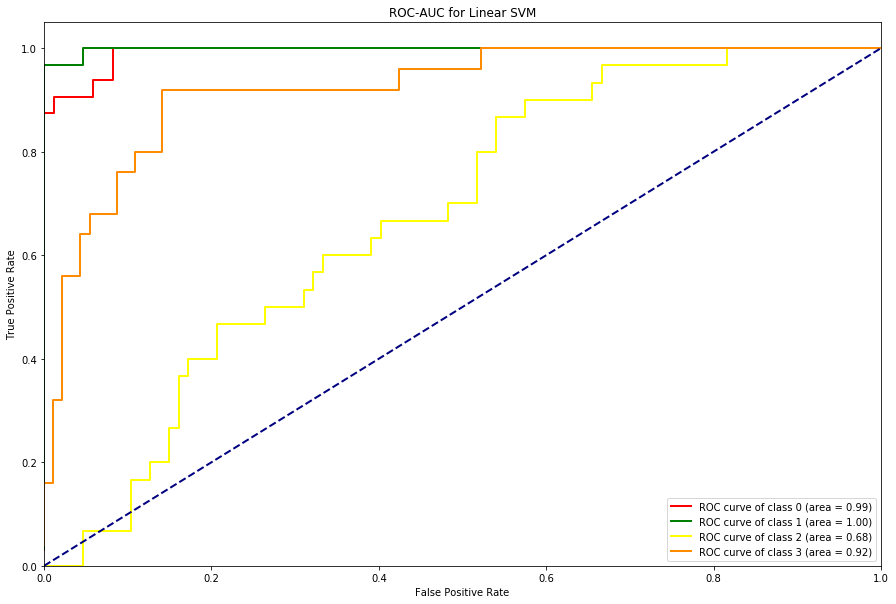

In [32]:
# roc-auc for linear SVM
rocauc_curve(linSVM_y_score,'ROC-AUC for Linear SVM')

In [18]:
# Multinomial LR starts
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(fdf, tar, test_size=0.2, random_state=0)
X_train = X_train.fillna(X_train.mean())
min_max_scaler = preprocessing.MinMaxScaler()
XtrainNm = min_max_scaler.fit_transform(X_train)
X_train = XtrainNm
X_validation = X_validation.fillna(X_validation.mean())
XValNm = min_max_scaler.fit_transform(X_validation)
X_validation = XValNm

In [19]:
# MLR
lr_classifier = OneVsRestClassifier(LogisticRegression(solver='sag', max_iter=10000,multi_class='multinomial',C=20))

In [20]:
lr_y_score = lr_classifier.fit(X_train, Y_train).decision_function(X_validation)

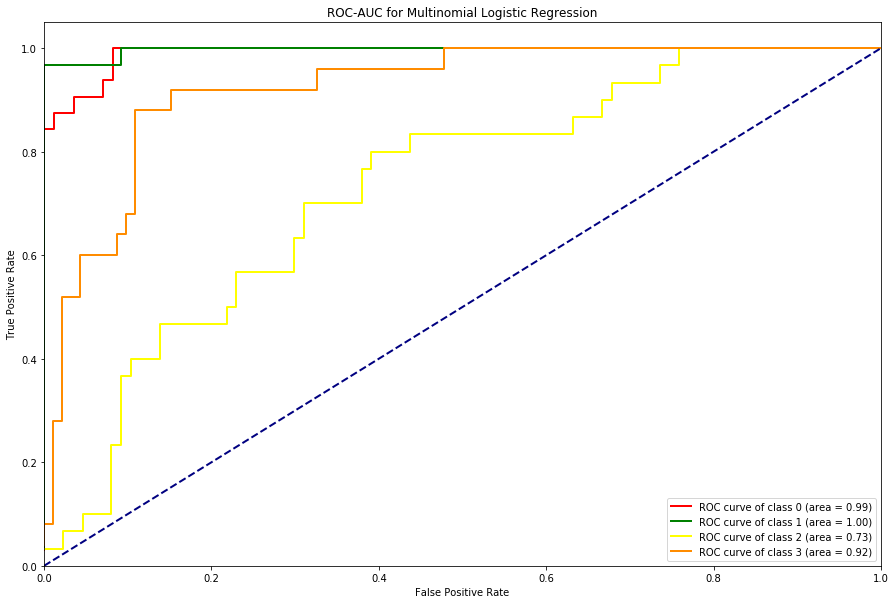

In [33]:
# roc-auc for MLR
rocauc_curve(lr_y_score,'ROC-AUC for Multinomial Logistic Regression')